# Autoencoders

In [ ]:
%tensorflow_version 2.x

In [ ]:
%pylab inline
from tensorflow import keras

Populating the interactive namespace from numpy and matplotlib


In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
])

In [ ]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [ ]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                   optimizer='adam')

In [ ]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10,
                                  validation_data=[x_test, x_test])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1446 - val_loss: 0.1080
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1052 - val_loss: 0.1012
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1004 - val_loss: 0.0974
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0978 - val_loss: 0.0955
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0959 - val_loss: 0.0940
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0944 - val_loss: 0.0926
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0931 - val_loss: 0.0910
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0916 - val_loss: 0.0901
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0906 - val_loss: 0.0891
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.08

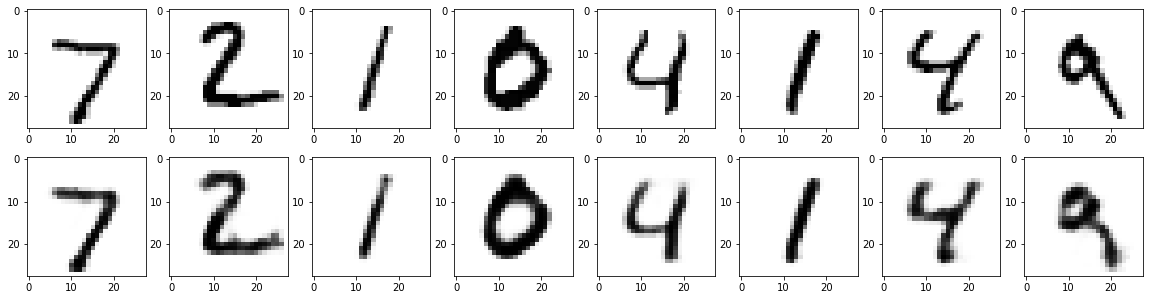

In [ ]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  imshow(x_test[i], cmap="binary")

  subplot(2, 8, i+8+1)
  imshow(pred.reshape((28, 28)), cmap="binary")

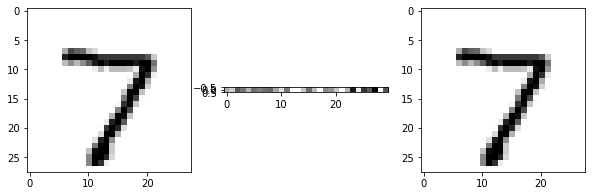

In [ ]:
i = 0 # change this number

figsize(10, 5)

subplot(1, 3, 1)
imshow(x_test[i], cmap="binary")

subplot(1, 3, 2)
latent_vector = encoder.predict(x_test[i].reshape((1, 28, 28)))
imshow(latent_vector, cmap="binary")

subplot(1, 3, 3)
pred = decoder.predict(latent_vector)
imshow(x_test[i], cmap="binary")

In [ ]:
30 / (28 * 28), 1 - 30 / (28 * 28)

(0.03826530612244898, 0.9617346938775511)

In [ ]:
encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2)
])

In [ ]:
encoder.predict(x_test[0].reshape((1, 28, 28))).shape

(1, 3, 3, 64)

In [ ]:
decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=2, padding="valid",
                                 activation="relu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [ ]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                            optimizer='adam')

In [ ]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10,
                         validation_data=[x_test, x_test])

Epoch 1/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1232 - val_loss: 0.0835
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0809 - val_loss: 0.0777
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0765 - val_loss: 0.0745
Epoch 4/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0741 - val_loss: 0.0728
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0725 - val_loss: 0.0717
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0715 - val_loss: 0.0710
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0707 - val_loss: 0.0700
Epoch 8/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0701 - val_loss: 0.0693
Epoch 9/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0697 - val_loss: 0.0688
Epoch 10/10
1875/1875 [==============================] - 67s 36m

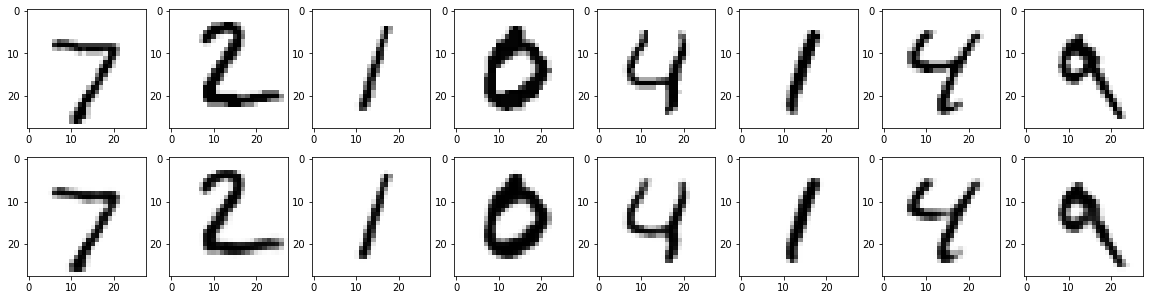

In [ ]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  imshow(x_test[i], cmap="binary")

  subplot(2, 8, i+8+1)
  imshow(pred.reshape((28, 28)), cmap="binary")

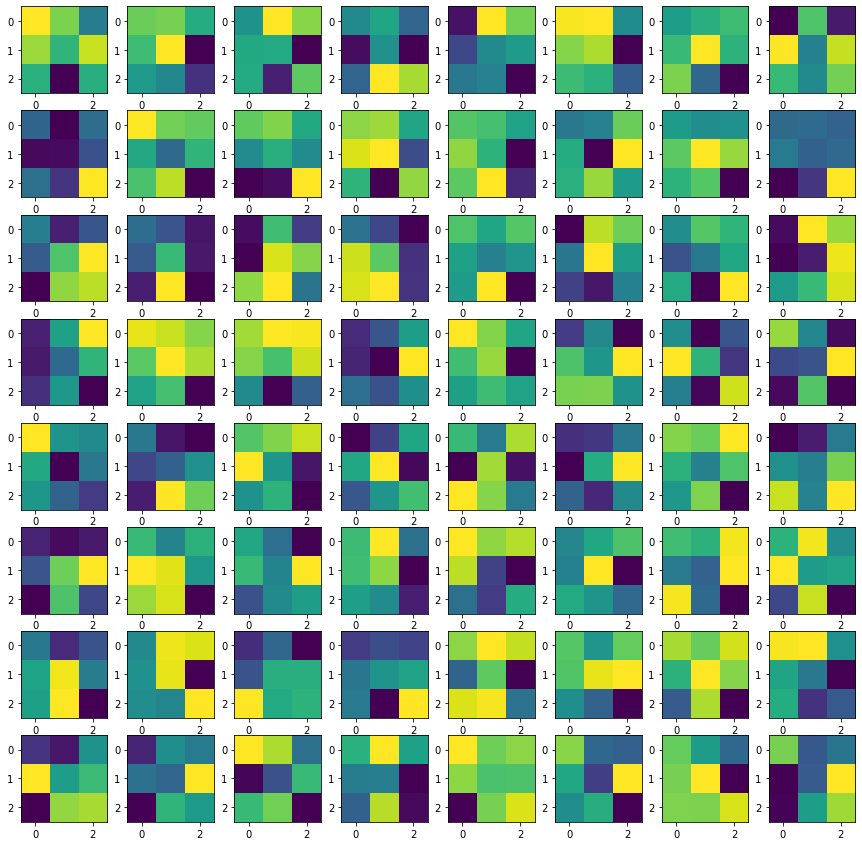

In [ ]:
figsize(15, 15)
for i in range(8 * 8):
  subplot(8, 8, i+1)
  imshow(encoder.layers[-2].weights[0][:, :, 0, i])

# **Denoising autoencoder**

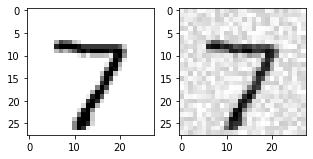

In [ ]:
import numpy as np
figsize(5, 10)
subplot(1, 2, 1)
imshow(x_test[0], cmap="binary")

subplot(1, 2, 2)
noise = np.random.random((28, 28)) / 4
imshow(x_test[0] + noise, cmap="binary")

In [ ]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu")
])

In [ ]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [ ]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                            optimizer='adam')

In [ ]:
x_train_noise = x_train + ((np.random.random(x_train.shape)) / 4)
x_test_noise = x_test + ((np.random.random(x_test.shape)) / 4)

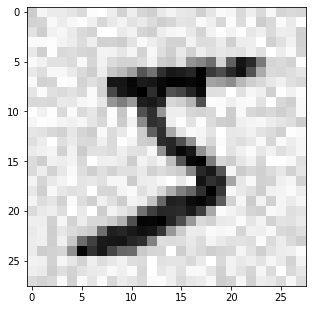

In [ ]:
imshow(x_train_noise[0], cmap="binary")

In [ ]:
history = stacked_autoencoder.fit(x_train_noise, x_train, epochs=5,
                                  validation_data=[x_test_noise, x_test])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1602 - val_loss: 0.1220
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1175 - val_loss: 0.1118
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1095 - val_loss: 0.1055
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1049 - val_loss: 0.1015
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1019 - val_loss: 0.1005


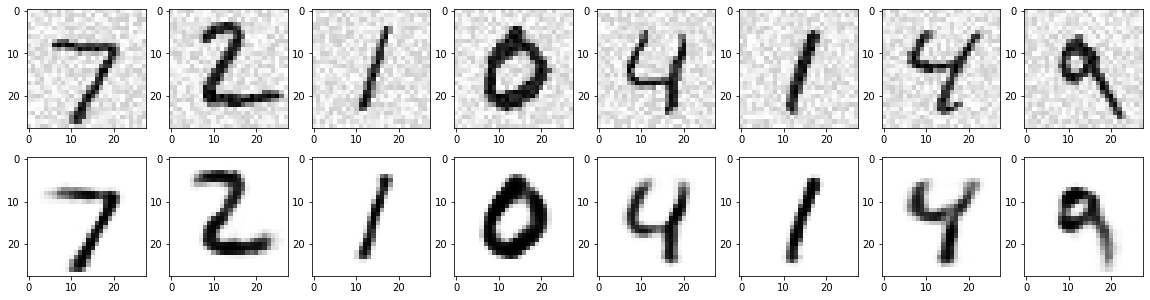

In [ ]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  imshow(x_test_noise[i], cmap="binary")

  subplot(2, 8, i+8+1)
  pred = stacked_autoencoder.predict(x_test_noise[i].reshape((1, 28, 28)))
  imshow(pred.reshape((28, 28)), cmap="binary")